# Download data HR ANALYTICS CHALLENGE from Analytics Vidhya

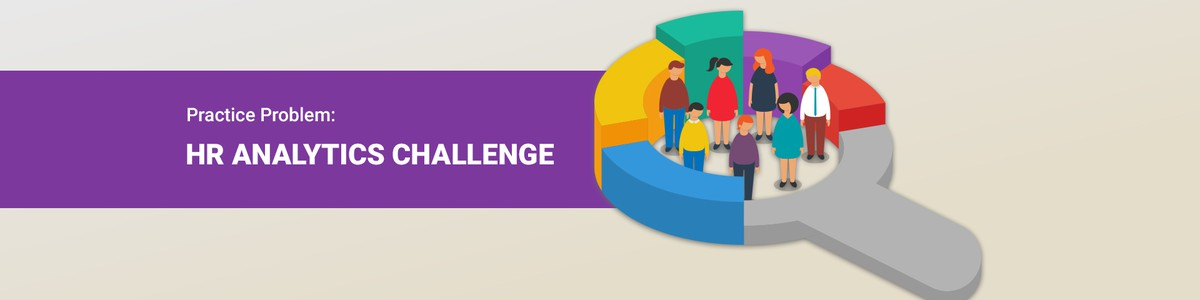

Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1. They first identify a set of employees based on recommendations/ past performance
2. Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical
3. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion.
 
 For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.
 
 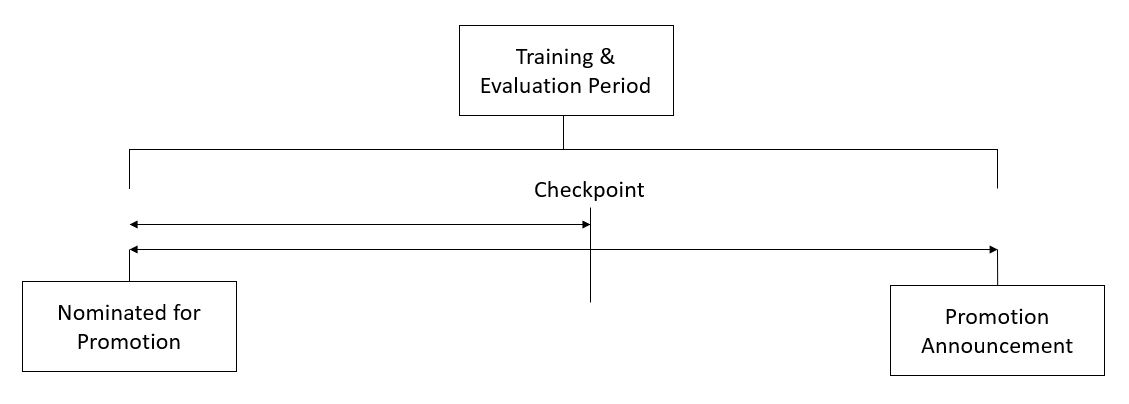
 
 They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Train Data

In [2]:
hr = pd.read_csv('train_LZdllcl.csv')

In [3]:
hr.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


### Information

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


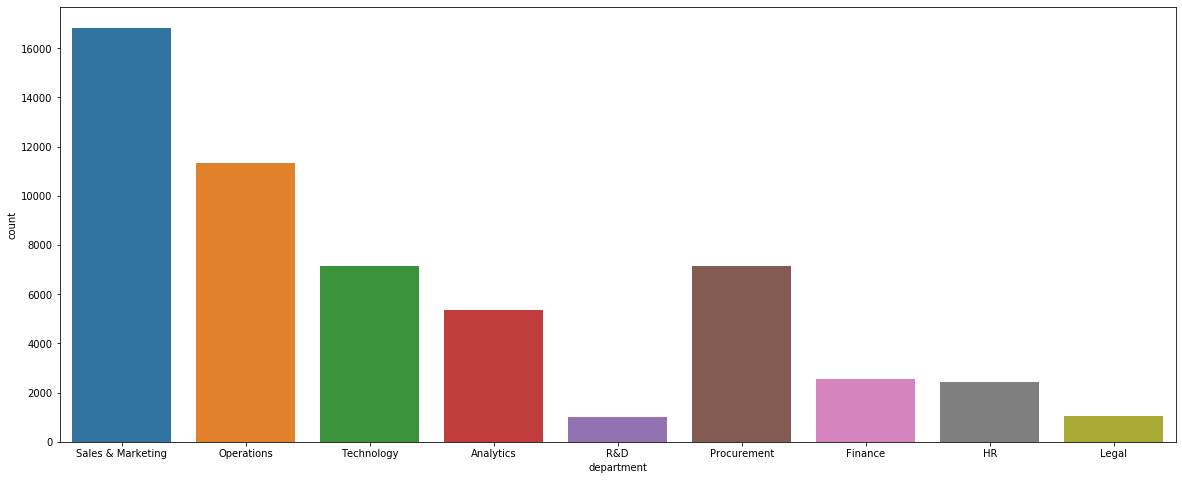

In [5]:
plt.rcParams['figure.figsize'] = (20.0, 8.0)
sns.countplot('department', data=hr)

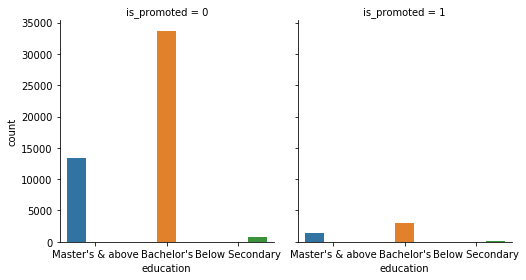

In [6]:
sns.catplot(x="education", hue="education", col="is_promoted",
                data=hr, kind="count",
                height=4, aspect=.9);

In [7]:
hr['education'].mode()

0    Bachelor's
dtype: object

In [8]:
hr['education'] = hr['education'].fillna("Bachelor's")

In [9]:
hr['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [10]:
mode1 = hr['previous_year_rating'].mode()
mode1

0    3.0
dtype: float64

In [11]:
hr['previous_year_rating'] = hr['previous_year_rating'].fillna(3)

In [12]:
hr['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(hr['gender'])
hr['gender']= le.transform(hr['gender'])

In [14]:
hr = pd.get_dummies(hr, columns=['department', 'education', 'recruitment_channel'])

In [15]:
hr.head()

,employee_id,region,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,...,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,region_7,0,1,35,5.0,8,1,0,49,...,0,0,1,0,0,0,1,0,0,1
1,65141,region_22,1,1,30,5.0,4,0,0,60,...,0,0,0,0,1,0,0,1,0,0
2,7513,region_19,1,1,34,3.0,7,0,0,50,...,0,0,1,0,1,0,0,0,0,1
3,2542,region_23,1,2,39,1.0,10,0,0,50,...,0,0,1,0,1,0,0,1,0,0
4,48945,region_26,1,1,45,3.0,2,0,0,73,...,0,0,0,1,1,0,0,1,0,0


## Spliting Data

In [16]:
X = hr.drop(['employee_id', 'region', 'is_promoted'], axis=1)
y = hr['is_promoted']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=107)

## Fitting Model

### KNN


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=250)
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=250)

In [19]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy_score:',accuracy_score(y_test,y_pred))

confusion_matrix:
 [[15009     5]
 [ 1331    98]]
accuracy_score: 0.9187496198990451


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15014
           1       0.95      0.07      0.13      1429

    accuracy                           0.92     16443
   macro avg       0.93      0.53      0.54     16443
weighted avg       0.92      0.92      0.89     16443



### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf= clf.fit(X_train, y_train)

In [22]:
y_pred1 = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.8988627379431977


In [24]:
from sklearn.metrics import confusion_matrix
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred1))

confusion_matrix:
 [[14130   884]
 [  779   650]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     15014
           1       0.42      0.45      0.44      1429

    accuracy                           0.90     16443
   macro avg       0.69      0.70      0.69     16443
weighted avg       0.90      0.90      0.90     16443



### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, random_state=107)
rf.fit(X_train, y_train)
y_pred2=rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
print('confusion_matrix:\n',confusion_matrix(y_test, y_pred2))

confusion_matrix:
 [[14853   161]
 [  948   481]]


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred2))

0.9325548865778751


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     15014
           1       0.75      0.34      0.46      1429

    accuracy                           0.93     16443
   macro avg       0.84      0.66      0.71     16443
weighted avg       0.92      0.93      0.92     16443



### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred3=gnb.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))

confusion matrix : 
 [[14350   664]
 [ 1132   297]]
0.8907741896247643


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     15014
           1       0.31      0.21      0.25      1429

    accuracy                           0.89     16443
   macro avg       0.62      0.58      0.59     16443
weighted avg       0.87      0.89      0.88     16443



In [32]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred4=bnb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred4))
print("Accuracy: \n",accuracy_score(y_test, y_pred4))

confusion matrix : 
 [[14863   151]
 [ 1336    93]]
Accuracy: 
 0.9095663808307487


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15014
           1       0.38      0.07      0.11      1429

    accuracy                           0.91     16443
   macro avg       0.65      0.53      0.53     16443
weighted avg       0.87      0.91      0.88     16443



In [34]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred5=mnb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred5))
print("Accuracy: \n",accuracy_score(y_test, y_pred5))

confusion matrix : 
 [[14838   176]
 [ 1268   161]]
Accuracy: 
 0.9121814753998662


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     15014
           1       0.48      0.11      0.18      1429

    accuracy                           0.91     16443
   macro avg       0.70      0.55      0.57     16443
weighted avg       0.88      0.91      0.89     16443



### Voting Classifier

In [36]:
from sklearn.ensemble import VotingClassifier
voting_clf_H = VotingClassifier(estimators=[('MNB', mnb), ('RF', rf), ('DT', clf), ('KNN', knn)], voting='hard')
voting_clf_H.fit(X_train, y_train)
y_pred6 =voting_clf_H.predict(X_test) 
from sklearn.metrics import confusion_matrix, accuracy_score
print("confusion matrix : \n",confusion_matrix(y_test, y_pred6))
print("Accuracy: \n",accuracy_score(y_test, y_pred6))

confusion matrix : 
 [[14997    17]
 [ 1277   152]]
Accuracy: 
 0.9213038983153926


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15014
           1       0.90      0.11      0.19      1429

    accuracy                           0.92     16443
   macro avg       0.91      0.55      0.57     16443
weighted avg       0.92      0.92      0.89     16443



# Test Data

In [38]:
hr_test = pd.read_csv('test_2umaH9m.csv')

In [39]:
hr_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [40]:
hr_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [41]:
hr_test['education'].mode()

0    Bachelor's
dtype: object

In [42]:
hr_test['education'] = hr_test['education'].fillna("Bachelor's")

In [43]:
hr_test['previous_year_rating'].mode()

0    3.0
dtype: float64

In [44]:
hr_test['previous_year_rating'] = hr_test['previous_year_rating'].fillna(3.0)

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(hr_test['gender'])
hr_test['gender']= le.transform(hr_test['gender'])

In [46]:
hr_test = pd.get_dummies(hr_test, columns=['department', 'education', 'recruitment_channel'])

In [47]:
X1 = hr_test.drop(['employee_id', 'region'], axis=1)

In [48]:
y_pred_test=rf.predict(X1)

In [50]:
HR_prediction = pd.read_csv('test_2umaH9m.csv')

HR_ID = HR_prediction['employee_id']

In [51]:
submission=pd.DataFrame({'employee_id':HR_ID, 'is_promoted':y_pred_test})
submission.to_csv("HR Analytics Prediction.csv",index=False)